### Задание 2
#### Условие
Г. И. Марчук предложил модель, которая описывает борьбу вирусов
$N_1 (t)$, антител $N_2 (t)$, и плазматических клеток $N_3 (t)$ в человеческом организме,
зараженном вирусной инфекцией. Мера зараженности определяется переменной
величиной $m(t)$. Модель Марчука описывается следующей системой уравнений:
\begin{cases}
 \dot N_1(t) = (\epsilon - \gamma N_2(t))N_1(t), \\
 \dot N_2(t) = \rho N_3(t) - (\mu + \nu \gamma N_1(t))N_2(t),(2) \\
 \dot N_3(t) = \alpha N_1(t) N_2(t) - \mu (N_3 - N_3^*) \\
 \dot m(t) = \sigma N_1 - \mu m(t)
\end{cases}
Здесь $\epsilon = 2$, $\gamma = 0.8$, $\rho = 0.17$, $\mu = 0.5$, $\nu \gamma = 8$; $\alpha = 10^4$ , если $m ≤ 0.1$;
$\alpha = 10^5(1 − m)/9$, если $0.1 ≤ m ≤ 1$; $\sigma > 0$.
Задачи:
1. Найти положения равновесия системы (2).
2. Исследовать на устойчивость положения равновесия системы (2).
3. Построить фазовые портреты системы (2) для разных начальных условий.
4. Установить бифуркационные значения параметра $\sigma$ для $N_3(t)$.

#### Решение задачи

Подключаем библиотеки:

In [1]:
%matplotlib notebook
from numpy import *
import pylab as p
from scipy.integrate import odeint
from scipy.optimize import fsolve

Введем параметры:

In [2]:
#parameters
eps = 2
gamma = 0.8
rho = 0.17
mu = 0.5
nu = 10
##
alpha = 10000
m = 0.09
##
sigma = 0.72

Определяем систему:

In [3]:
def dN_dt(N, t=0):
    return array([ (eps - gamma*N[1])*N[0],
                   rho * N[2] - (mu + nu*gamma*N[0])*N[1],
                  alpha*N[0]*N[1] - mu*(N[2] - N2_lag),
                  sigma*N[0] - mu*N[3]
                 ])

Вычисляем переменные используя указанные параметры:

In [4]:
N01 = (mu * m) / sigma
N02 = eps/gamma
N03 = (eps * (mu * sigma + nu * gamma * mu * m)) / (rho * sigma * gamma)
N2_lag = N03 - (alpha * N01 * N02) / mu
#N03 = (alpha*m*eps)/(sigma*gamma) + N2_lag

**Первое** положение равновесие найдем с помощью функции *fsolve* из пакета *scipy.optimize*:

In [5]:
N_f0 =  array(fsolve(dN_dt, (0.0,0.0,0.0,0.0)))
result = dN_dt(N_f0)
N_f0, result

(array([    0.        , -1057.5       , -3110.29411765,     0.        ]),
 array([ 0.,  0., -0.,  0.]))

**Вторую** точку находим исходя из наших переменных $N_{01}$, $N_{02}$, $N_{03}$ и $m$:

In [6]:
N_f1 = array([N01, N02, N03, m])
result = dN_dt(N_f1)
N_f1, result

(array([  0.0625    ,   2.5       ,  14.70588235,   0.09      ]),
 array([ 0.,  0.,  0.,  0.]))

Далее выписываем якобиан для того, что бы определить типы положений равновесия:

In [7]:
def jacobian(N, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[eps-gamma*N[1],      -gamma*N[0],           0,             0],
                  [ -nu*gamma*N[1], -mu -gamma*nu*N[0], rho,   0],
                  [ alpha*N[1], alpha*N[0],     -mu,           0],
                  [sigma,           0,          0,           -mu]
                 ])

Вычисляем якобианы и собственные числа:

In [8]:
A_f0 = jacobian(N_f0)
vlambda0 = linalg.eigvals(A_f0)
vlambda0

array([ -5.00000000e-01,  -5.00000000e-01,  -5.00000000e-01,
         8.48000000e+02])

In [9]:
A_f1 = jacobian(N_f1)
vlambda1 = linalg.eigvals(A_f1)
vlambda1

array([ -0.5       , -11.93379103,   8.29119495,   2.14259608])

Рассмотрим полученные собственные векторы:
1. $\lambda_1 = -0.5, \lambda_2 = -0.5, \lambda_3 = -0.5, \lambda_4 =848$. Учитывая то, что $\lambda_4 > 0$ получаем, что по первому приближению точка N_f1 = (0, -1057.5, -3110.29411765, 0) является неустойчивым положением равновесия.
2. $\lambda_1 = -0.5, \lambda_2 = -11.93379103, \lambda_3 = 8.29119495, \lambda_4 = 2.14259608$. Здесь $\lambda_3$ и $\lambda_4$ являются положительными числами, а остальные - отрицательными. Отсюда следует, что точка N_f2=(0.0625, 2.5,  14.70588235, 0.09) также является неустойчивым положением равновесия. 

Решим данную систему ДУ (2) для выбранных начальных данных:

In [10]:
t = arange(0, 2.4, 0.01)
X0 = array([30, 100, 50, 400])  
X, infodict = odeint(dN_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

Построим график модели:

<IPython.core.display.Javascript object>


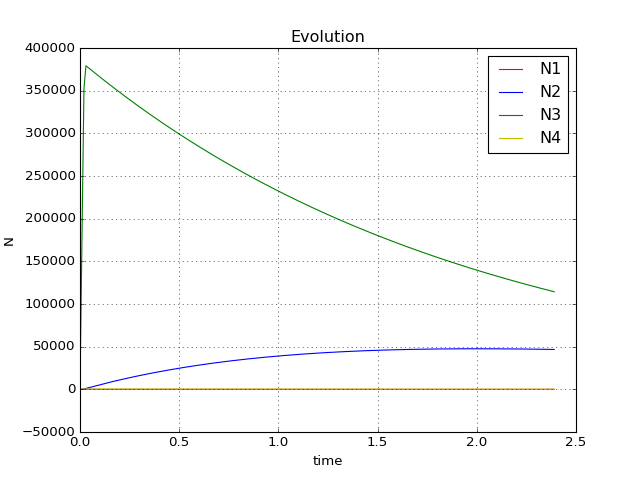

In [17]:
#!python
N1, N2, N3, N4  = X.T
p.plot(t, N1, 'r-', label='N1')
p.plot(t, N2, 'b-', label='N2')
p.plot(t, N3, 'g-', label='N3')
p.plot(t, N4, 'y-', label='N4')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('N')
p.title('Evolution')
p.show()

Построим фазовый портрет для разных значений:

<IPython.core.display.Javascript object>


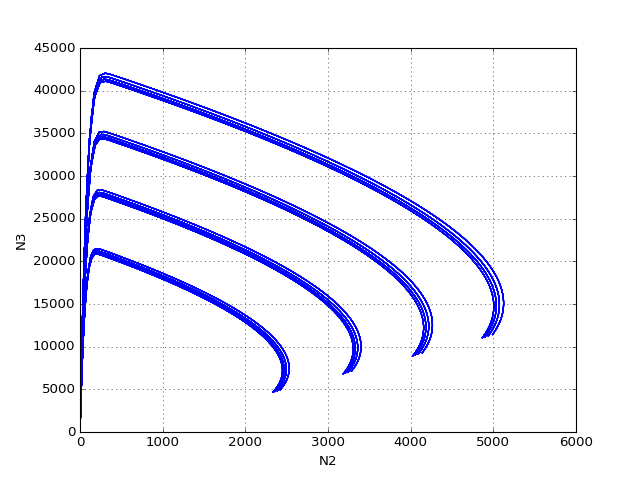

In [15]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

def drawPhasePortrait(deltaX = 1.0, deltaDX = 1.0, deltaZX = 1.0, deltaKX = 1.0, startX = 0.0,  stopX = 5.0,
                      startDX = 0.0, stopDX = 5.0, startZX=1.0, stopZX=5.0, startKX=0.0,stopKX=5.0,x=1, y=2):
    for y0 in frange(startX, stopX, deltaX):
            for dy0 in frange(startDX, stopDX, deltaDX):
                for dz0 in frange(startZX, stopZX, deltaZX):
                    for dk0 in frange(startKX, stopKX, deltaKX): 
                        sol = odeint(dN_dt, [y0, dy0, dz0, dk0], t)
                        p.plot(sol[:, x-1], sol[:, y-1], 'b')
    p.xlabel('N'+str(x))
    p.ylabel('N'+str(y))
    p.grid()
    p.show()

drawPhasePortrait(0.5, 0.5, 0.5, 0.5, 1.5, 3.5, 1.5, 3.5, 1.5, 3.5, 1.5, 3.5, 2, 3)

Фазовый портрет возле точки N_f2:

<IPython.core.display.Javascript object>


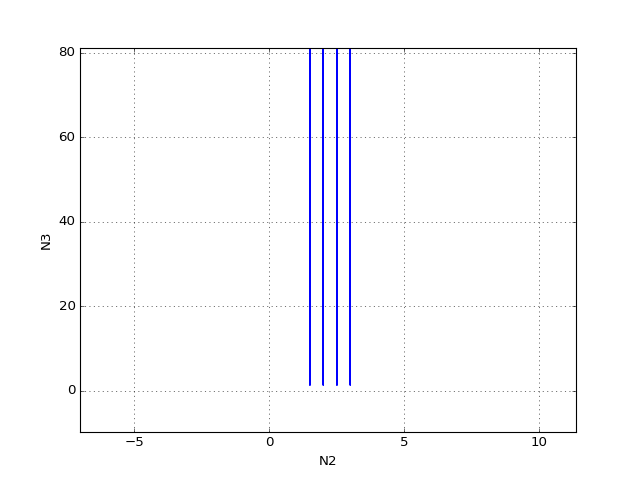

In [16]:
drawPhasePortrait(0.5, 0.5, 0.5, 0.5, 1.5, 3.5, 1.5, 3.5, 1.5, 3.5, 1.5, 3.5, 2, 3)

Как видно, фазовые портреты для данной системы с заданными выше параметрами содержат большое количество параллельных траекторий.

#### Использованная литература
1. [Положения равновесия линейных автономных систем](http://www.math24.ru/%D0%BF%D0%BE%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F-%D1%80%D0%B0%D0%B2%D0%BD%D0%BE%D0%B2%D0%B5%D1%81%D0%B8%D1%8F-%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D1%85-%D0%B0%D0%B2%D1%82%D0%BE%D0%BD%D0%BE%D0%BC%D0%BD%D1%8B%D1%85-%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC.html)
2. [Устойчивость в первом приближении](http://www.math24.ru/%D1%83%D1%81%D1%82%D0%BE%D0%B9%D1%87%D0%B8%D0%B2%D0%BE%D1%81%D1%82%D1%8C-%D0%B2-%D0%BF%D0%B5%D1%80%D0%B2%D0%BE%D0%BC-%D0%BF%D1%80%D0%B8%D0%B1%D0%BB%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8.html)
3. [Автономные системы. Элементы теории устойчивости](https://mipt.ru/education/chair/mathematics/upload/0a5/pigolkina_2a5.pdf)
4. [Построение фазовых портретов на языке Python](https://digiratory.ru/435)
5. [Matplotlib: lotka volterra tutorial](http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html)